/Users/tietie/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


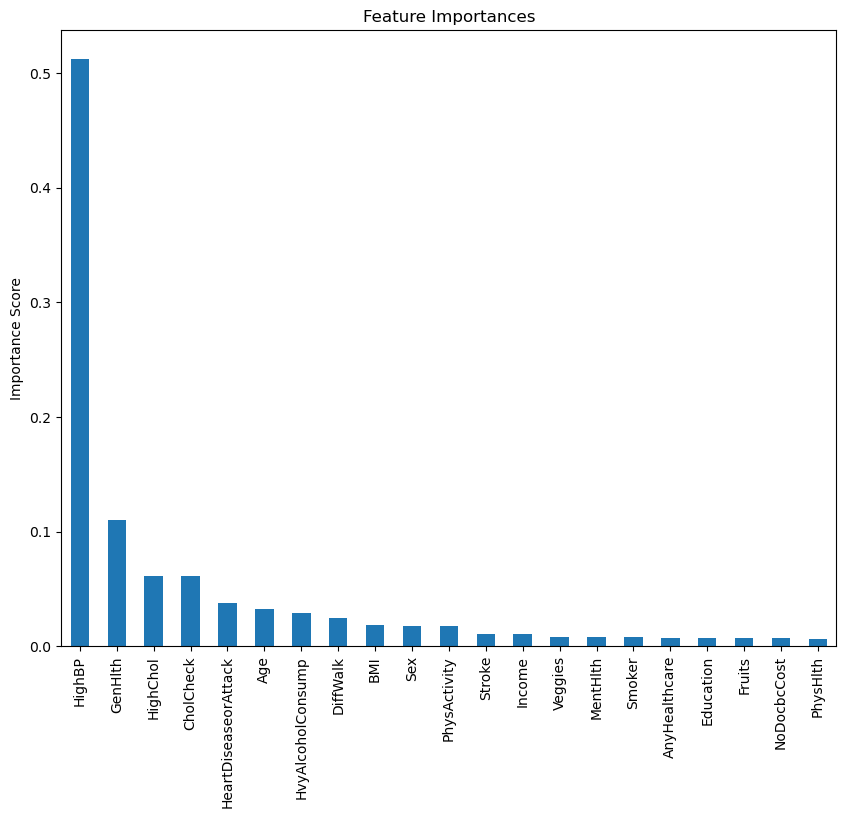

Precision: 0.30
Recall: 0.77
F1 Score: 0.44
AUC-ROC: 0.82


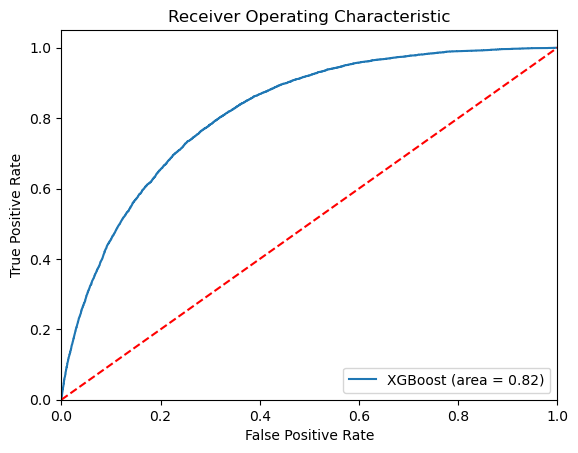

In [3]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, roc_curve


df = pd.read_csv('thesis dataset.csv')  

# Prepare the data
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = xgb.XGBClassifier(scale_pos_weight=sum(y_train==0) / sum(y_train==1), 
                          objective='binary:logistic',
                          eval_metric='auc',
                          use_label_encoder=False)
model.fit(X_train, y_train)


feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)


feature_importances_sorted = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(10,8))
feature_importances_sorted.plot(kind='bar', title='Feature Importances')
plt.ylabel('Importance Score')
plt.show()


y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]

# Calculate metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)

# Print the metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")

# Optional: Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


/Users/tietie/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


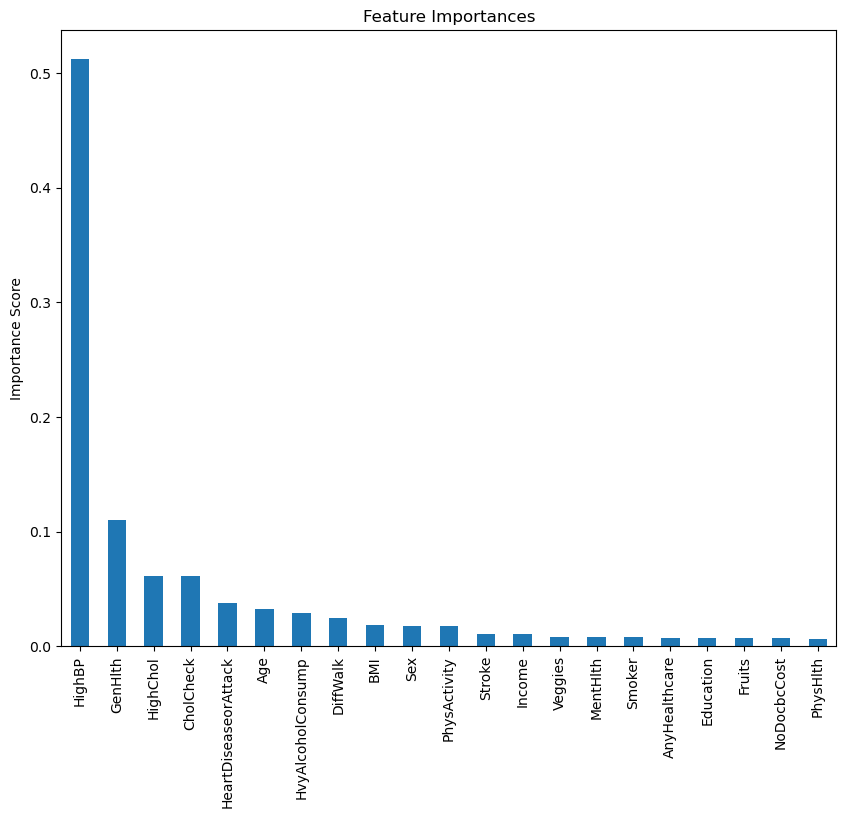

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split


df = pd.read_csv('thesis dataset.csv')  


X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = xgb.XGBClassifier(scale_pos_weight=sum(y_train==0) / sum(y_train==1),
                          objective='binary:logistic', eval_metric='auc', use_label_encoder=False)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)

# Sort and plot feature importances
feature_importances_sorted = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(10,8))
feature_importances_sorted.plot(kind='bar', title='Feature Importances')
plt.ylabel('Importance Score')


plt.savefig('Feature_Importance.png')
plt.show()
